<a href="https://colab.research.google.com/github/tavishcode/fyp/blob/master/wiki_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Input, Activation, CuDNNGRU, GRU, Dense
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import scale, StandardScaler, RobustScaler
from collections import OrderedDict, defaultdict
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')
plt.rcParams['figure.figsize'] = [10, 8] 
from scipy import fftpack as fftp

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
train_start = 0
train_end = 100
ds = np.load('drive/My Drive/rescaled_dataset.npy')
train = ds[:, train_start:train_end]
train.shape

(27222, 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


Text(0.5, 1.0, 'Fourier Magnitudes')

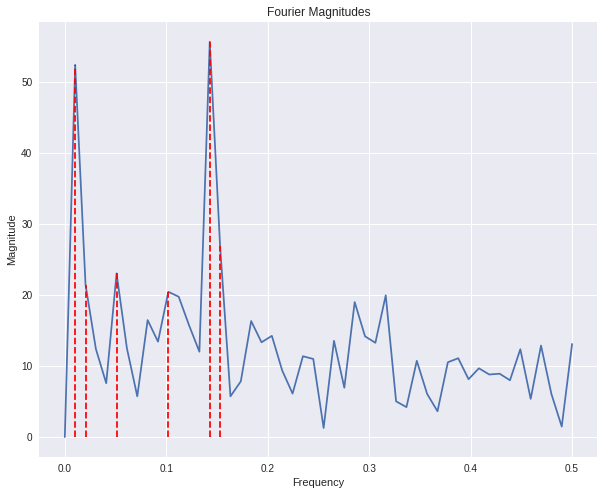

In [205]:
agg_train = np.sum(train, axis=0)

# Number of samplepoints
N = 100

# sample spacing
T = 1 

# noramlized data
y = agg_train - np.mean(agg_train)

xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

yf = fftp.fft(y)

plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))

num_peaks = 6

top_peaks = np.argsort(2.0/N * np.abs(yf[:N//2]))[::-1][:num_peaks]

for peak in top_peaks:
  plt.plot([xf[peak], xf[peak]], [0, 2.0/N * np.abs(yf[peak])], 'r--')

plt.ylabel('Magnitude')
plt.xlabel('Frequency')
plt.title('Fourier Magnitudes')


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


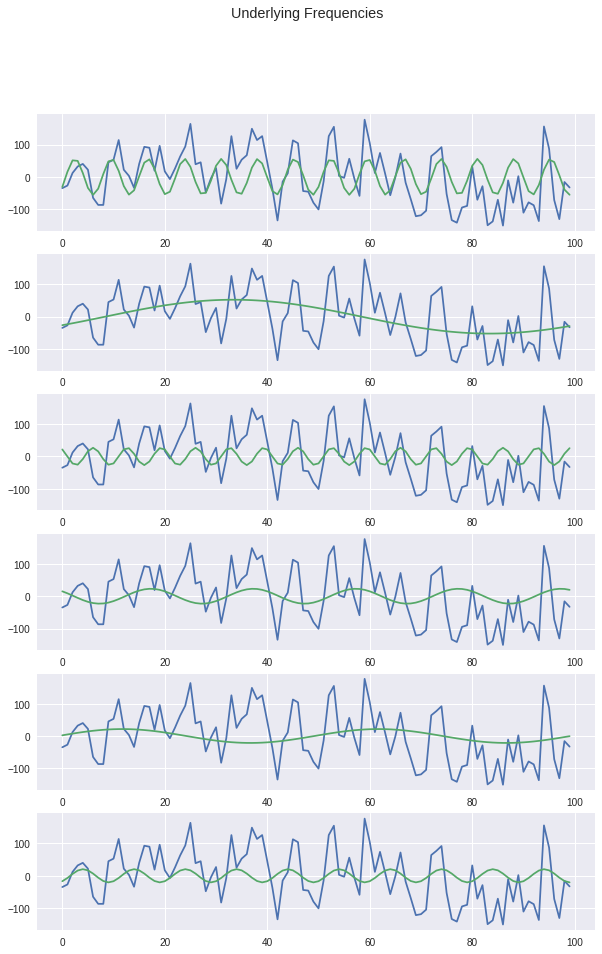

In [206]:
top_peak_pairs = np.argsort(2.0/N * np.abs(yf))[::-1][:num_peaks*2]
fig, axes = plt.subplots(6, 1)
fig.set_size_inches(10, 15)
fig.suptitle('Underlying Frequencies')
count = 0
for i in range(0, top_peak_pairs.shape[0], 2):
  yff = np.copy(yf)
  for j in range(len(yff)):
    if j != top_peak_pairs[i] and j != top_peak_pairs[i+1]:
      yff[j] = 0
  axes[count].plot(agg_train-np.mean(agg_train))
  axes[count].plot(fftp.ifft(yff))
  count+=1